# KMeans and PCA Clustering Analysis on Breast Cancer Data
This notebook explores clustering the breast cancer dataset using KMeans. We will:
1. Cluster the raw standardized data with KMeans
2. Apply PCA (via SVD), visualize explained variance and loadings
3. Cluster the PCA-reduced data with KMeans
4. Visualize and compare all results to understand the role of dimensionality reduction.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score

plt.style.use('seaborn-v0_8-whitegrid') # Changed style to a valid option
np.random.seed(42)

## Step 1: Load and Standardize the Dataset

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['label'] = df['target'].apply(lambda i: target_names[i])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


## Step 2: Visualize Original Feature Distributions (Subset)

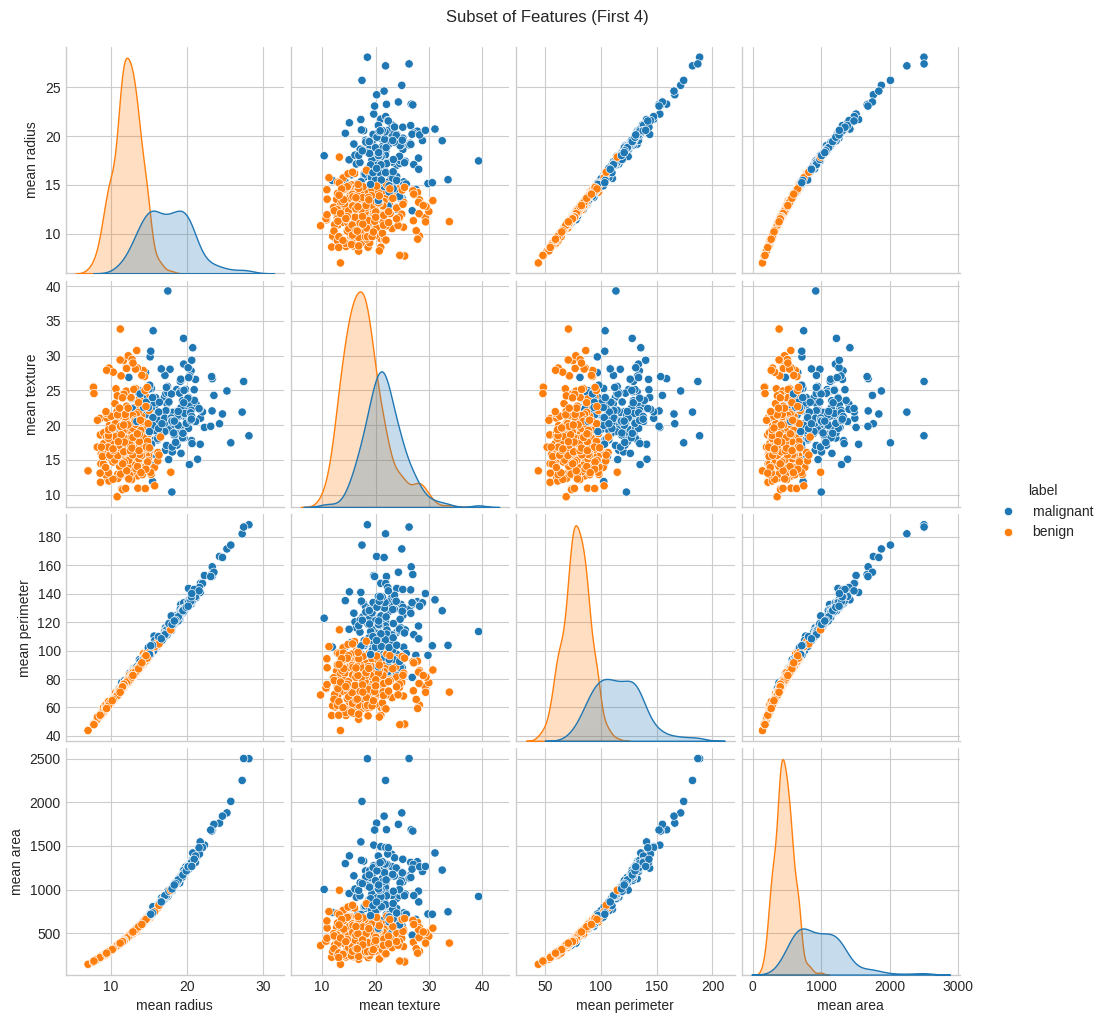

In [ ]:
sns.pairplot(df.iloc[:, [0, 1, 2, 3] + [-1]], hue='label', diag_kind='kde')
plt.suptitle('Subset of Features (First 4)', y=1.02)
plt.show()

## Step 3: KMeans on Full Standardized Data

In [ ]:
kmeans_raw = KMeans(n_clusters=2, n_init='auto')
labels_raw = kmeans_raw.fit_predict(X_scaled)

df['cluster_raw'] = labels_raw
cm_raw = confusion_matrix(df['target'], df['cluster_raw'])
sil_raw = silhouette_score(X_scaled, labels_raw)

print("Confusion Matrix (Raw Data):\n", cm_raw)
print(f"Silhouette Score (Raw Data): {sil_raw:.3f}")

Confusion Matrix (Raw Data):
 [[175  37]
 [ 13 344]]
Silhouette Score (Raw Data): 0.345


## Step 4: PCA via SVD and Explained Variance

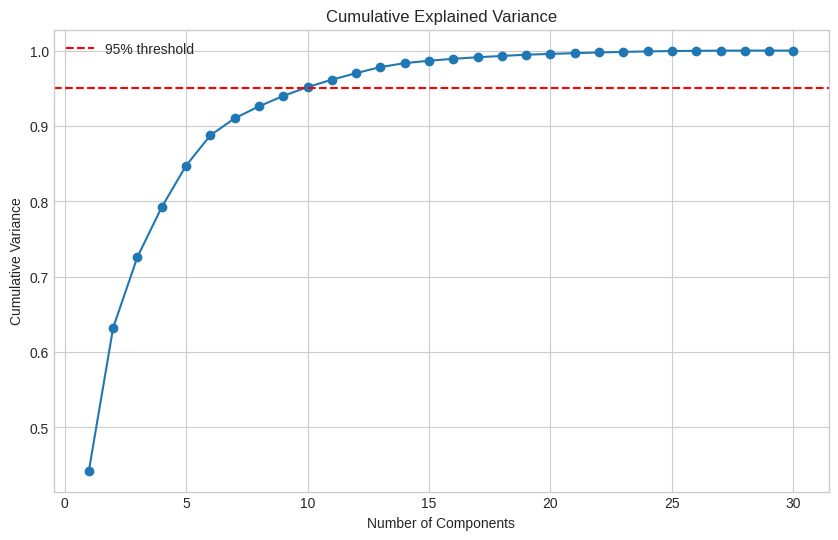

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Step 5: PCA Score Plot (First 2 PCs)

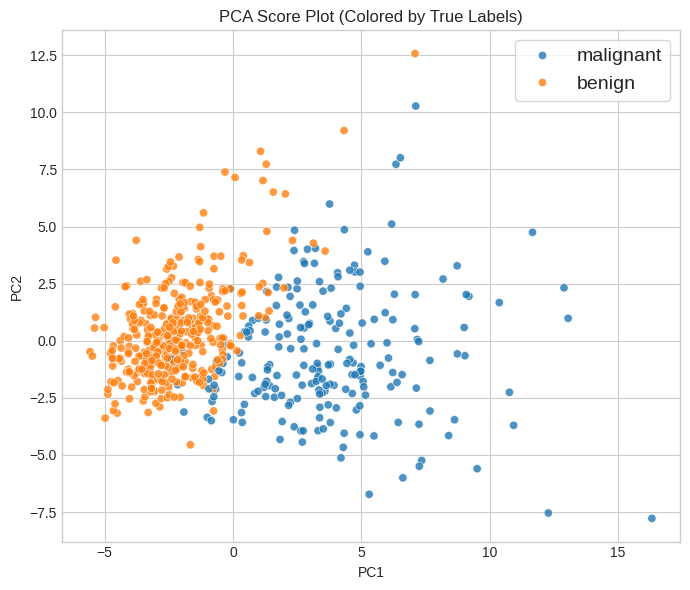

In [ ]:
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['label'] = df['label']

plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', alpha=0.8)
plt.title('PCA Score Plot (Colored by True Labels)')
plt.grid(True)
plt.legend(loc='best', fontsize=14, frameon=True)
plt.tight_layout()
plt.show()

## Step 6: PCA Loadings (PC1 vs PC2)

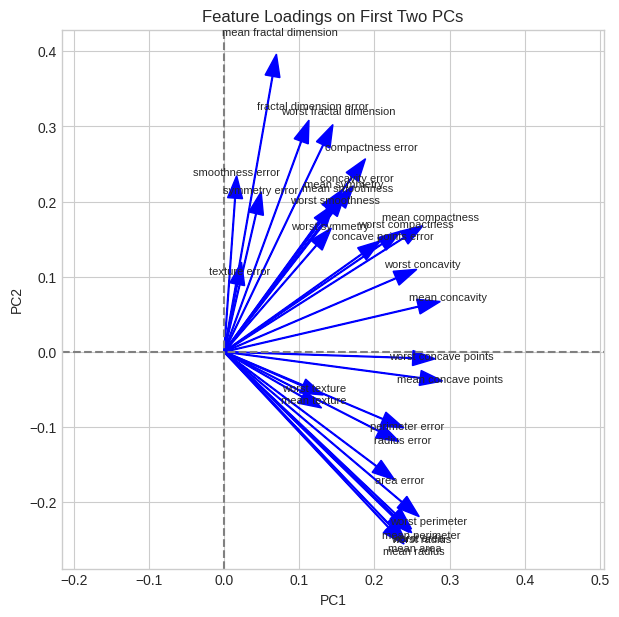

In [ ]:
loadings = pca.components_[:2].T
plt.figure(figsize=(7, 7))
for i, f in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.02, head_length=0.03, color='blue')
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, f, fontsize=8, ha='center')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Feature Loadings on First Two PCs')
plt.axis('equal')
plt.grid(True)
plt.show()

## Step 7: KMeans on PCA-Reduced Data (First 2 PCs)

In [ ]:
kmeans_pca = KMeans(n_clusters=2, n_init='auto')
labels_pca = kmeans_pca.fit_predict(X_pca[:, :2])

pca_df['cluster'] = labels_pca
cm_pca = confusion_matrix(df['target'], labels_pca)
sil_pca = silhouette_score(X_pca[:, :2], labels_pca)

print("Confusion Matrix (PCA-Reduced Data):\n", cm_pca)
print(f"Silhouette Score (PCA-Reduced): {sil_pca:.3f}")

Confusion Matrix (PCA-Reduced Data):
 [[175  37]
 [ 15 342]]
Silhouette Score (PCA-Reduced): 0.508


## Step 8: Visualize KMeans Clusters in PCA Space

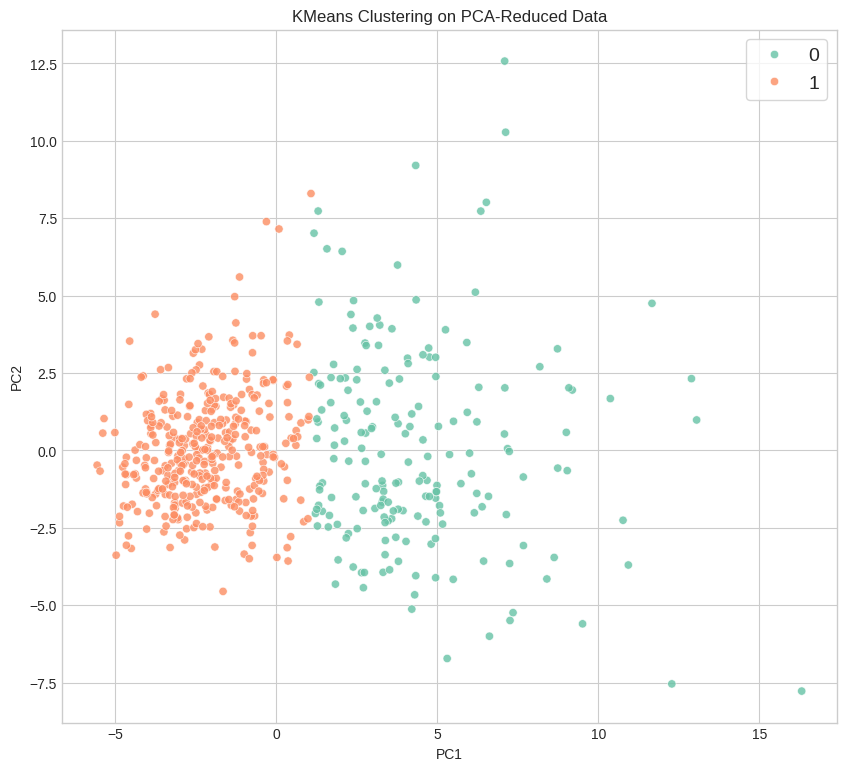

In [ ]:
plt.figure(figsize=(10,9))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', alpha=0.8)
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.legend(loc='best', fontsize=14, frameon=True)
plt.grid(True)
plt.show()

## Step 9: Reflection and Analysis
Based on your results:
- How did clustering on raw data compare to PCA-reduced data?
- Did dimensionality reduction improve clustering structure?
- How do feature loadings explain the PCA separation?
- What would you do next to improve clustering further?